## ME5413: Autonomous Mobile Robot  

### Homework 1: Perception  


### 0. Install Packages
Prefered use of these version so that the code can be run during evaluation

In [1]:
# !pip install numpy==1.23
# !pip install torch==2.1.0
# !pip install transformers==4.48.1
# !pip install timm==1.0.14
# !pip install matplotlib

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from transformers import AutoImageProcessor, DetrForObjectDetection

## Task 1.1 Single-Object Tracking 


In [6]:
from TemplateMatchingTracker import TemplateMatchingTracker
from NeuralNetObjectTracker import NeuralNetObjectTracker
from run import run

In [3]:
MODES = ('sqdiff', 'sqdiff_normed', 'cross_correl', 'cross_correl_normed', 'correl_coeff', 'correl_coeff_normed')
PRECISION_THRES = 20
IOU_THRES = 0.5
N_DATA_SEQ = 5

NN_DETECTION_THRES = 0.75

### Using Template Matching


In [4]:
# tmpl_match_tracker = TemplateMatchingTracker()
# for mode in MODES:
#     precision = 0
#     success = 0
#     for i in range(1, N_DATA_SEQ + 1):
#         p, s = run('template-matching', tmpl_match_tracker, i, mode=mode, precision_thres=PRECISION_THRES, iou_thres=IOU_THRES)
#         precision += p
#         success += s
#     print()

Seq=1, tm mode=sqdiff, precision=0.36000001430511475, success=0.36666667461395264
Seq=2, tm mode=sqdiff, precision=0.046666666865348816, success=0.046666666865348816
Seq=3, tm mode=sqdiff, precision=0.03333333507180214, success=0.05999999865889549
Seq=4, tm mode=sqdiff, precision=0.3199999928474426, success=0.2933333218097687
Seq=5, tm mode=sqdiff, precision=0.7333333492279053, success=0.7333333492279053
Average precision=0.29866667166352273
Average success=0.3000000022351742

Seq=1, tm mode=sqdiff_normed, precision=0.36000001430511475, success=0.47333332896232605
Seq=2, tm mode=sqdiff_normed, precision=0.0533333346247673, success=0.0533333346247673
Seq=3, tm mode=sqdiff_normed, precision=0.03333333507180214, success=0.03333333507180214
Seq=4, tm mode=sqdiff_normed, precision=0.4866666793823242, success=0.4333333373069763
Seq=5, tm mode=sqdiff_normed, precision=0.7266666889190674, success=0.7266666889190674
Average precision=0.33200001046061517
Average success=0.34400000497698785

Seq=

In [ ]:
tmpl_match_tracker = TemplateMatchingTracker()

precision = 0
success = 0
for i in range(1, N_DATA_SEQ + 1):
    p, s = run('template-matching', tmpl_match_tracker, i, mode='correl_coeff', precision_thres=PRECISION_THRES, iou_thres=IOU_THRES)
    precision += p
    success += s

precision_avg = precision / N_DATA_SEQ
success_avg = success / N_DATA_SEQ
print(f'Average precision={precision_avg}')
print(f'Average success={success_avg}')

Seq=1, tm mode=correl_coeff, precision=0.41333332657814026, success=0.5266666412353516
Seq=2, tm mode=correl_coeff, precision=0.4933333396911621, success=0.4933333396911621
Seq=3, tm mode=correl_coeff, precision=0.03333333507180214, success=0.046666666865348816
Seq=4, tm mode=correl_coeff, precision=0.23999999463558197, success=0.2133333384990692
Seq=5, tm mode=correl_coeff, precision=0.7400000095367432, success=0.7400000095367432
Average precision=0.38400000110268595
Average success=0.403999999165535


### Using Object Detection algorithm and Association


In [5]:

nn_tracker = NeuralNetObjectTracker()

precision = 0
success = 0
for i in range(1, N_DATA_SEQ + 1):
    if i != 5:
        obj = 'person'
    else:
        obj = 'cat'

    p, s = run('neural-net', nn_tracker, i, obj_of_interest=obj, detection_thres=NN_DETECTION_THRES, precision_thres=PRECISION_THRES, iou_thres=IOU_THRES)
    precision += p
    success += s

precision_avg = precision / N_DATA_SEQ
success_avg = success / N_DATA_SEQ
print(f'Average precision={precision_avg}')
print(f'Average success={success_avg}')


Some weights of the model checkpoint at /home/kslooi/Msc_Robotics/Semester-4/ME5413/Homework/HW1/01_Single_Object_Tracking/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Seq=1, detection_thres=0.75, precision=0.9399999976158142, success=0.9666666388511658
Seq=2, detection_thres=0.75, precision=0.8333333134651184, success=0.7933333516120911
Seq=3, detection_thres=0.75, precision=0.0, success=0.019999999552965164
Seq=4, detection_thres=0.75, precision=0.02666666731238365, success=0.06666667014360428
Seq=5, detection_thres=0.75, precision=0.19333332777023315, success=0.3333333432674408
Average precision=0.3986666612327099
Average success=0.4360000006854534


Evaluate the performance of the Single object tracking algorithm for both **Template Matching** and **Detection Algorithm with Association**. Using the **Success** and **Precision** metrics. 

$$
Success = \frac{BB_{tr} \cap BB_{gt}}{BB_{tr} \cup BB_{gt}} ;    
Precision = || C_{tr} - C_{gt} ||_2
$$


Visualise the results as well. 


In [28]:
def visualise(img, pred_bbox, gt_bbox):
    fig, ax = plt.subplots(1, 1)
    tracked_bbox_colour = (0, 255, 0)
    gt_bbox_colour = (237, 161, 9)

    top_left, bottom_right = TemplateMatchingTracker._get_bbox_points(pred_bbox)
    img = TemplateMatchingTracker._draw_bbox(img, top_left, bottom_right, tracked_bbox_colour, 2, 'Tracked')

    top_left, bottom_right = TemplateMatchingTracker._get_bbox_points(gt_bbox)
    img = TemplateMatchingTracker._draw_bbox(img, top_left, bottom_right, gt_bbox_colour, 2, 'Ground truth')

    ax.imshow(img)

Tracking Results for this image using Template matching is (xmin, ymin, width, height): (430, 18, 175, 312)
Tracking Results for this image using Object Detection is (xmin, ymin, width, height): (229, 0, 100, 190)


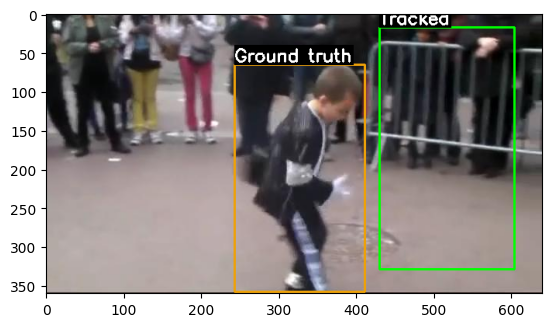

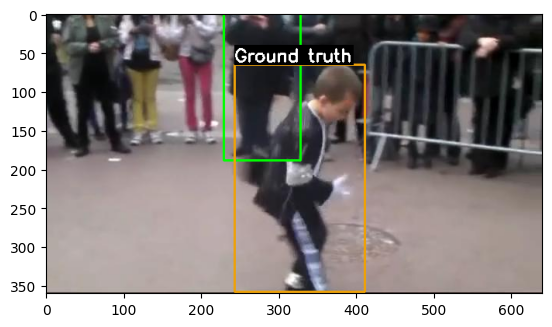

In [ ]:
# Video for each sequence is saved in results folder

# Code below only visualise tracking result of a frame from seq 3
img_file = 'data/seq3/img/00000015.jpg'
img = cv2.cvtColor(cv2.imread(img_file), cv2.COLOR_BGR2RGB)
gt = np.loadtxt('data/seq3/groundtruth.txt', dtype=np.uint32, delimiter=',')
gt_bbox = gt[14]

# Template matching with CCOEFF metric
pred = np.loadtxt('results/1_template_matching/correl_coeff/trackresults_TM_seq3.txt', dtype=np.uint32, delimiter=',')
pred_bbox = pred[14]
x, y, w, h = pred_bbox
print(f'Tracking Results for this image using Template matching is (xmin, ymin, width, height): ({x}, {y}, {w}, {h})')
visualise(img.copy(), pred_bbox, gt_bbox)

# Object detection with association
pred = np.loadtxt('results/2_objectdetection_withassociation/det_thres=0.75/trackresults_TM_seq3.txt', dtype=np.uint32, delimiter=',')
pred_bbox = pred[14]
x, y, w, h = pred_bbox
print(f'Tracking Results for this image using Object Detection is (xmin, ymin, width, height): ({x}, {y}, {w}, {h})')
visualise(img.copy(), pred_bbox, gt_bbox)

Propose Improvements to the work if possible:

In [32]:
# Using template matching technique with more focused search region

tmpl_match_tracker = TemplateMatchingTracker()

precision = 0
success = 0
for i in range(1, N_DATA_SEQ + 1):
    p, s = run('template-matching-focused-search', tmpl_match_tracker, i, mode='correl_coeff', precision_thres=PRECISION_THRES, iou_thres=IOU_THRES)
    precision += p
    success += s

precision_avg = precision / N_DATA_SEQ
success_avg = success / N_DATA_SEQ
print(f'Average precision={precision_avg}')
print(f'Average success={success_avg}')

Seq=1, tm mode=correl_coeff, precision=0.5066666603088379, success=0.653333306312561
Seq=2, tm mode=correl_coeff, precision=0.7066666483879089, success=0.7066666483879089
Seq=3, tm mode=correl_coeff, precision=0.03333333507180214, success=0.05999999865889549
Seq=4, tm mode=correl_coeff, precision=0.0533333346247673, success=0.05999999865889549
Seq=5, tm mode=correl_coeff, precision=0.7400000095367432, success=0.7400000095367432
Average precision=0.4079999975860119
Average success=0.44399999231100085


Tracking Results for this image using Template matching is (xmin, ymin, width, height): (430, 18, 175, 312)


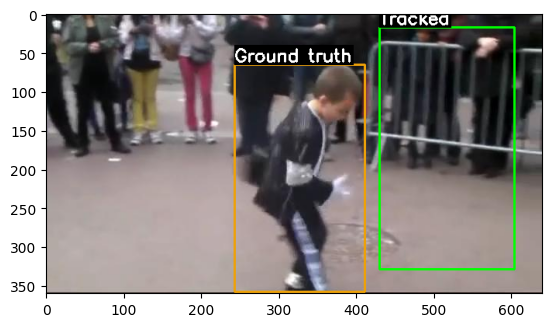

In [30]:
# Code below only visualise tracking result of a frame from seq 3
img_file = 'data/seq3/img/00000015.jpg'
img = cv2.cvtColor(cv2.imread(img_file), cv2.COLOR_BGR2RGB)
gt = np.loadtxt('data/seq3/groundtruth.txt', dtype=np.uint32, delimiter=',')
gt_bbox = gt[14]

# Template matching with CCOEFF metric
pred = np.loadtxt('results/3_improved/correl_coeff/trackresults_TM_seq3.txt', dtype=np.uint32, delimiter=',')
pred_bbox = pred[14]
x, y, w, h = pred_bbox
print(f'Tracking Results for this image using Template matching is (xmin, ymin, width, height): ({x}, {y}, {w}, {h})')
visualise(img.copy(), pred_bbox, gt_bbox)